# Task 4.1: PCA Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from helper import *
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

### Load data

In [3]:
X_train_raw, y_train = load_dataset("../data/training1_no_incidents.csv")
X_test_raw, y_test   = load_dataset("../data/training2_with_incidents.csv")

# Select sensors to consider
sensors = X_train_raw.columns

# Scale to unit variance
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_raw[sensors])
X_train = scaler.transform(X_train_raw[sensors])
X_test = scaler.transform(X_test_raw[sensors])

### Visualize principal components vs. explained variance

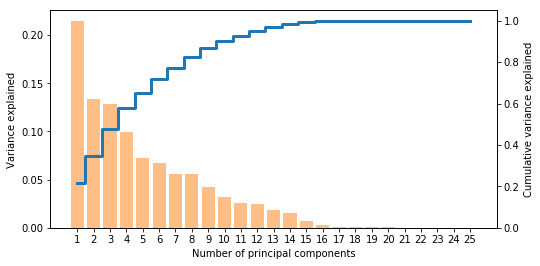

In [4]:
_, _, _, variance = pca_model(X_train, X_train_raw.index, n_components=25)
plot_variance(*variance, save="output/pca_variance.pdf")

### Visualize outliers (Training 1)

Visualizing outliers when reconstructing data with 43 PCA components.


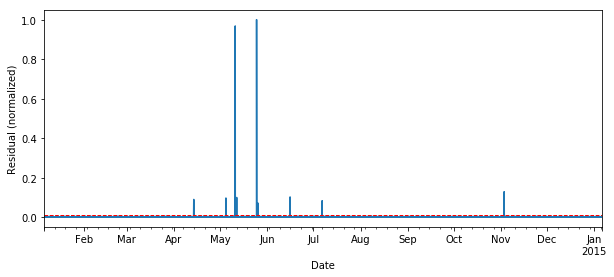

In [5]:
print("Visualizing outliers when reconstructing data with {:d} PCA components.".format(len(sensors)))
_, _, residuals, _ = pca_model(X_train, X_train_raw.index, n_components=len(sensors))
plot_residuals(residuals, threshold=.01, save="output/pca_train_residuals.pdf")

### Find outlier threshold

In [6]:
_, _, residuals, _ = pca_model(X_train, X_train_raw.index, n_components=4)

In [7]:
sorted(residuals, reverse=True)[:25]

[1.0,
 0.9914880739165959,
 0.8903366707109516,
 0.8483755636296426,
 0.24450047325731092,
 0.2421310809719341,
 0.24102591003519322,
 0.24002646965109536,
 0.23809333933547985,
 0.23694184385758696,
 0.23657559211474782,
 0.23623328116922385,
 0.23615567524628084,
 0.23559412118975243,
 0.23479002808066204,
 0.234298233856727,
 0.2338923289781449,
 0.23027836498369664,
 0.22834027849022254,
 0.2280225835784261,
 0.009765569263939471,
 0.009201743057721597,
 0.008895911540332811,
 0.008749871606574143,
 0.008719229961327431]

In [8]:
residuals[residuals > .01]

DATETIME
2014-04-13 20:00:00    0.242131
2014-04-13 21:00:00    0.236942
2014-04-13 22:00:00    0.234298
2014-05-04 22:00:00    0.240026
2014-05-04 23:00:00    0.228023
2014-05-11 00:00:00    0.991488
2014-05-11 01:00:00    0.890337
2014-05-11 23:00:00    0.228340
2014-05-12 00:00:00    0.233892
2014-05-25 00:00:00    1.000000
2014-05-25 01:00:00    0.848376
2014-05-25 20:00:00    0.244500
2014-05-25 21:00:00    0.241026
2014-05-25 22:00:00    0.234790
2014-06-15 21:00:00    0.236233
2014-06-15 22:00:00    0.236156
2014-07-06 21:00:00    0.235594
2014-07-06 22:00:00    0.236576
2014-11-02 22:00:00    0.238093
2014-11-02 23:00:00    0.230278
dtype: float64

With a threshold of .01, we find the outliers visible in the outlier plot.<br>
In `4.2 - PCA Model`, we remove these outliers before training the model.